# <font color='red'>Smartphones Price Prediction</font>

# 1. Problem Statement

In the rapidly evolving smartphone market, where consumers are inundated with a plethora of choices, determining an optimal pricing strategy is paramount for smartphone manufacturers. With fierce competition and ever-changing consumer preferences, accurately predicting smartphone prices can significantly impact a company's market positioning and profitability. 

The objective of this project is to develop a predictive model using regression techniques that can forecast smartphone prices based on various factors such as Brands, Colors, Memory, Storage, Rating,  Selling Price and Discount.<br>

By leveraging advanced analytics and machine learning techniques, the model aims to provide insights to optimize pricing decisions, enhance competitiveness, and maximize revenue in the dynamic smartphone market landscape.

# 2. Data Collection

The dataset was collected from kaggle website.

https://www.kaggle.com/datasets/yaminh/smartphone-sale-dataset/data

# 3. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

# 4.Data Exploration

### Loading the dataset

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


### Shape of the dataset

In [4]:
df.shape

(3114, 12)

The Datset consists of 12 features & 3114 samples.

### Summary of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [6]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [7]:
df.nunique().sort_values()

Camera                   1
Brands                  17
Rating                  25
Memory                  26
Storage                 26
Discount               267
discount percentage    539
Colors                 639
Original Price         819
Selling Price          844
Models                 914
Mobile                 928
dtype: int64

### Columns present in dataset

In [8]:
df.columns

Index(['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating',
       'Selling Price', 'Original Price', 'Mobile', 'Discount',
       'discount percentage'],
      dtype='object')


Columns present in dataset are :

- Brands: The brands of smartphones included in the dataset.
- Models: Indicates the model name of the sepecific brand.
- Colors: The colors available for the smartphones.
- Memory: The storage capacity of the smartphones, typically measured in gigabytes (GB) or megabytes (MB).
- Storage: The internal storage capacity of the smartphones, often measured in gigabytes (GB) or megabytes (MB).
- Camera: Indicate weather camera is present in the device or not.
- Rating: The user ratings or scores assigned to the smartphones, reflecting user satisfaction or performance.
- Selling Price: The price at which the smartphones are sold to consumers.
- Original Price: The original or list price of the smartphones before any discounts or promotions.
- Mobile: Indicates the mame of the mobile phone.
- Discount: The discount applied to the original price to calculate the selling price.
- Discount percentage: The percentage discount applied to the original price to calculate the selling price.

# 5. Data Cleaning

### 1.Checking null values

In [9]:
df.isnull().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

### 2. Imputing missing values

In [10]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

As 'Rating' column has large no of missing values those values were filled with the mean of the non-missing values of the column.

### 3.Dropping null values

In [11]:
df=df.dropna()

In [12]:
df.shape

(3032, 12)

82 samples were dropped from the dataset

### 4.Dropping unwanted columns

#### 1. Camera column

In [13]:
df['Camera'].value_counts()

Yes    3032
Name: Camera, dtype: int64

In [14]:
df = df.drop(columns=['Camera'])

AS all the devices have camera present, so i am droping the column.

#### 2. Colors column

In [15]:
df['Colors'].value_counts()

Black                462
Gold                 190
White                154
Blue                 146
Silver                99
                    ... 
Breeze Blue            1
Iris Charcoal          1
MAGIC BLUE             1
Phantom Green          1
Sapphire Gradient      1
Name: Colors, Length: 637, dtype: int64

In [16]:
df = df.drop(columns=['Colors'])

Each brand has its own set of color names, so I'm dropping the column.

#### 3. Mobile & Model column

In [17]:
df['Mobile'].value_counts()

Apple iPhone 11             36
Apple iPhone XR             27
Apple iPhone 11 Pro         21
Apple iPhone 7              21
Apple iPhone 7 Plus         20
                            ..
Google Pixel Very Silver     1
Xiaomi Redmi 6               1
LG K7i                       1
OPPO A71 New Edition         1
ASUS ROG Phone 5 Pro         1
Name: Mobile, Length: 919, dtype: int64

In [18]:
df['Models'].value_counts()

iPhone 11           36
iPhone XR           27
3                   26
iPhone 7            21
iPhone 11 Pro       21
                    ..
Y83                  1
Very Silver          1
Redmi 6              1
K7i                  1
ROG Phone 5 Pro      1
Name: Models, Length: 905, dtype: int64

Every Brands has different model and mobile.<br>
So 'Mobile'and 'Models' column creates redundancy . Thus droping these column.

In [19]:
df = df.drop(columns=['Mobile'])

In [20]:
df = df.drop(columns=['Models'])

### 5.Checking values of columns

#### 1. Memory column

In [21]:
df['Memory'].value_counts()

4 GB      740
6 GB      488
3 GB      488
2 GB      387
8 GB      341
1 GB      193
4GB       137
12 GB      61
512 MB     46
4 MB       39
1.5 GB     29
16 MB      16
64 MB      15
8 MB       14
32 MB      14
768 MB      6
128 MB      4
10 MB       3
2 MB        2
46 MB       2
18 GB       2
16 GB       2
153 MB      1
30 MB       1
100 MB      1
Name: Memory, dtype: int64

Here we can see little problem with our dataset it's given 4GB . I will changed it to 4 GB

In [22]:
df['Memory'] = df['Memory'].replace('4GB', '4 GB')

In [23]:
df['Memory'].value_counts()

4 GB      877
6 GB      488
3 GB      488
2 GB      387
8 GB      341
1 GB      193
12 GB      61
512 MB     46
4 MB       39
1.5 GB     29
16 MB      16
64 MB      15
8 MB       14
32 MB      14
768 MB      6
128 MB      4
10 MB       3
2 MB        2
46 MB       2
18 GB       2
16 GB       2
153 MB      1
30 MB       1
100 MB      1
Name: Memory, dtype: int64

#### 2. Storage column

In [24]:
df['Storage'].value_counts()

64 GB                    772
128 GB                   759
32 GB                    555
16 GB                    322
256 GB                   234
8 GB                     133
512 GB                    63
4 GB                      56
4 MB                      28
2 MB                      26
16 MB                     14
1 TB                      14
128 MB                    12
Expandable Upto 32 GB     10
Expandable Upto 16 GB      7
8 MB                       6
64 MB                      3
129 GB                     3
256 MB                     3
48 MB                      3
512 MB                     2
130 GB                     2
100 MB                     2
153 MB                     1
10 MB                      1
140 MB                     1
Name: Storage, dtype: int64

In [25]:
df['Storage'] = df['Storage'].str.replace('Expandable Upto ', '')

In [26]:
df['Storage'].value_counts()

64 GB     772
128 GB    759
32 GB     565
16 GB     329
256 GB    234
8 GB      133
512 GB     63
4 GB       56
4 MB       28
2 MB       26
1 TB       14
16 MB      14
128 MB     12
8 MB        6
64 MB       3
129 GB      3
256 MB      3
48 MB       3
512 MB      2
130 GB      2
100 MB      2
153 MB      1
10 MB       1
140 MB      1
Name: Storage, dtype: int64

# 6. Exploratory Data Analysis (EDA)

### Visualizing Distribution of memory column

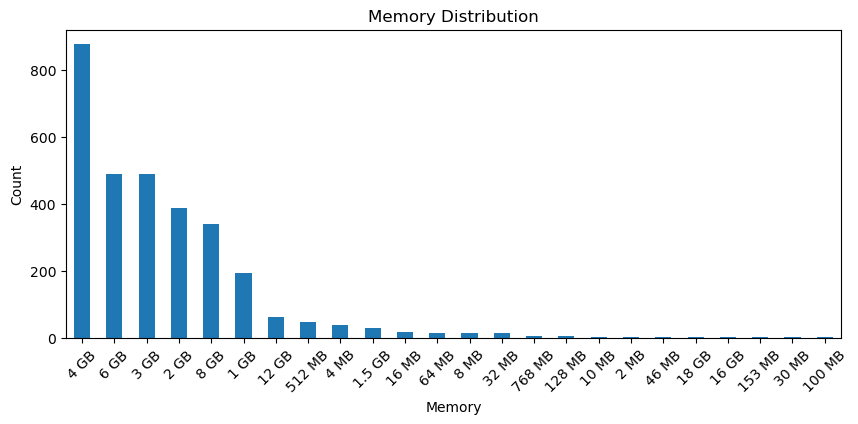

In [27]:
plt.figure(figsize=(10, 4))
df['Memory'].value_counts().plot(kind='bar')
plt.title('Memory Distribution')
plt.xlabel('Memory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Visualizing Distribution of storage column

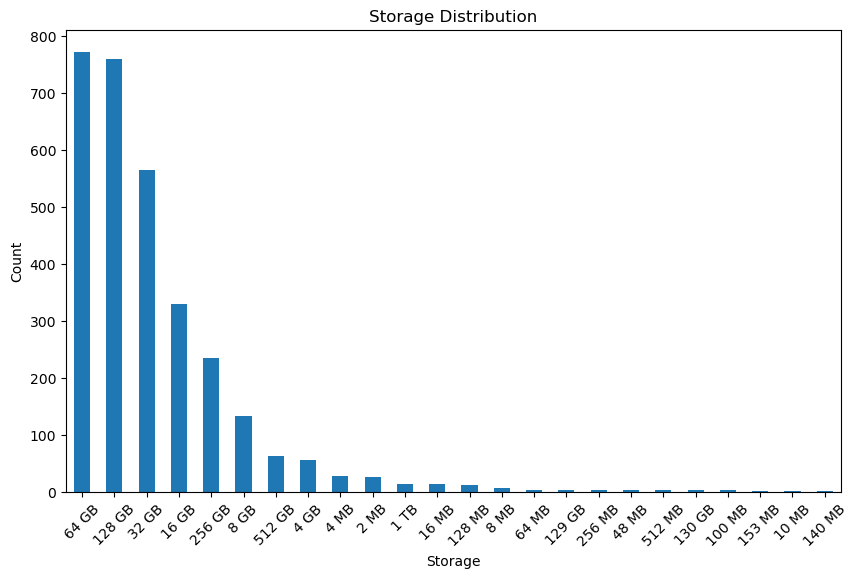

In [28]:
plt.figure(figsize=(10, 6))
df['Storage'].value_counts().plot(kind='bar')
plt.title('Storage Distribution')
plt.xlabel('Storage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Visualizing Distribution of Selling Price

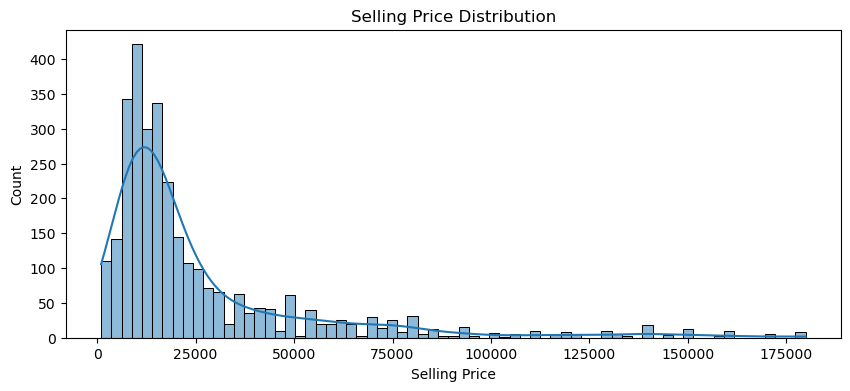

In [29]:
plt.figure(figsize=[10,4])
plt.title('Selling Price Distribution')
sns.histplot(df['Selling Price'],kde=True)
plt.show()

### Visualizing Realationship b/w brand and selling price

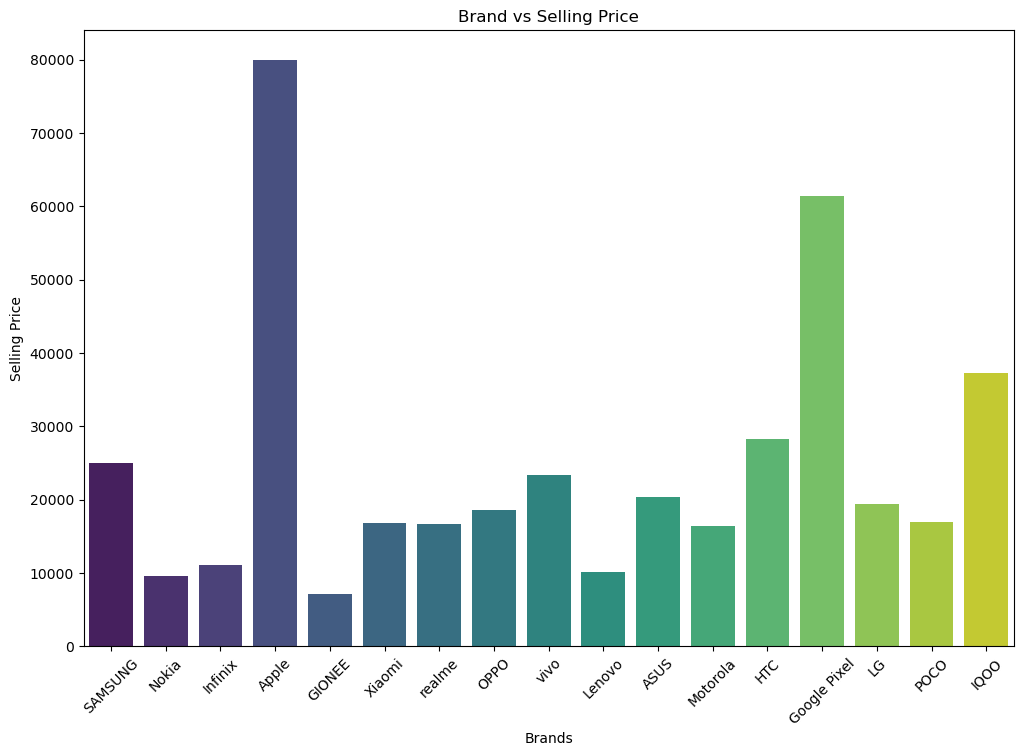

In [30]:
plt.figure(figsize=(12, 8))

# Create a bar plot of Brand versus Original Price
sns.barplot(x='Brands', y='Selling Price', data=df, ci=None, palette='viridis')

plt.xlabel('Brands')
plt.ylabel('Selling Price')
plt.title('Brand vs Selling Price')
plt.xticks(rotation=45)

plt.show()

### Correlation matrix of numerical variables

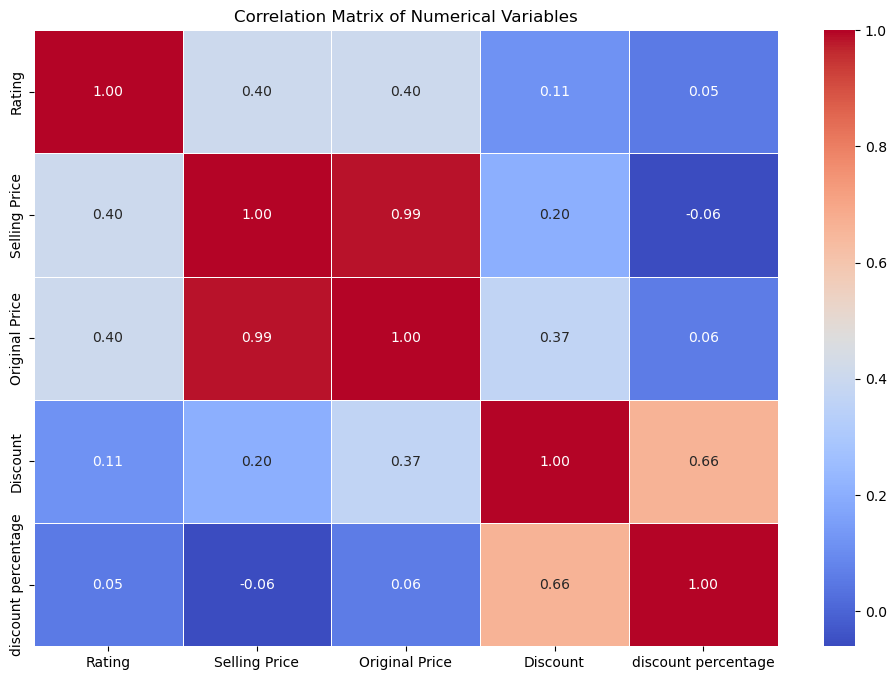

In [31]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

AS we can see that Original Price and the Selling Price is Highly correlated, So I am Keeping one

In [32]:
df = df.drop(columns=['Original Price'])

# 7.Data Preprocessing

### 1. Converting Storage and Memory to MB format

In [33]:
# function to convert gb,tb, mb to mb
def mbconverter(x):    
    if "GB" in x:
        x=x.replace("GB","")        
        x=x.replace(" ","")   
        size=float(x)*1024
    elif "MB" in x:
        x=x.replace("MB","")
        x=x.replace(" ","")
        size=float(x)
    elif "TB" in x:
        x=x.replace("TB","")
        x=x.replace(" ","")
        size=float(x)*1024*1024    
    return size

In [34]:
df['Memory']=df['Memory'].apply(mbconverter)

In [35]:
df['Storage']=df['Storage'].apply(mbconverter)

In [36]:
df

,Brands,Memory,Storage,Rating,Selling Price,Discount,discount percentage
0,SAMSUNG,8192.0,131072.0,4.300000,19330,1669,7.947998
1,Nokia,2048.0,16384.0,3.800000,10199,0,0.000000
3,Infinix,4096.0,65536.0,4.200000,12999,0,0.000000
4,Apple,4096.0,65536.0,4.600000,49900,0,0.000000
5,GIONEE,8.0,16.0,4.000000,2199,0,0.000000
...,...,...,...,...,...,...,...
3108,SAMSUNG,4.0,2.0,4.200000,2299,0,0.000000
3109,POCO,6144.0,131072.0,4.400000,16999,3000,15.000750
3111,Apple,2048.0,131072.0,4.500000,44900,0,0.000000
3112,Apple,6144.0,131072.0,4.243098,119900,0,0.000000


### 2. One-hot encoding

In [37]:
brand_encoded = pd.get_dummies(df['Brands'], prefix='Brand').astype(int)

df = pd.concat([df, brand_encoded], axis=1)

df.head()


,Brands,Memory,Storage,Rating,Selling Price,Discount,discount percentage,Brand_ASUS,Brand_Apple,Brand_GIONEE,...,Brand_LG,Brand_Lenovo,Brand_Motorola,Brand_Nokia,Brand_OPPO,Brand_POCO,Brand_SAMSUNG,Brand_Xiaomi,Brand_realme,Brand_vivo
0,SAMSUNG,8192.0,131072.0,4.3,19330,1669,7.947998,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Nokia,2048.0,16384.0,3.8,10199,0,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Infinix,4096.0,65536.0,4.2,12999,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Apple,4096.0,65536.0,4.6,49900,0,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,GIONEE,8.0,16.0,4.0,2199,0,0.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df = df.drop(columns=['Brands'])

created new features using one-hot encoding of column brand and then droping the brand column

In [39]:
df.head()

,Memory,Storage,Rating,Selling Price,Discount,discount percentage,Brand_ASUS,Brand_Apple,Brand_GIONEE,Brand_Google Pixel,...,Brand_LG,Brand_Lenovo,Brand_Motorola,Brand_Nokia,Brand_OPPO,Brand_POCO,Brand_SAMSUNG,Brand_Xiaomi,Brand_realme,Brand_vivo
0,8192.0,131072.0,4.3,19330,1669,7.947998,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2048.0,16384.0,3.8,10199,0,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4096.0,65536.0,4.2,12999,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4096.0,65536.0,4.6,49900,0,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8.0,16.0,4.0,2199,0,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3032 entries, 0 to 3113
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Memory               3032 non-null   float64
 1   Storage              3032 non-null   float64
 2   Rating               3032 non-null   float64
 3   Selling Price        3032 non-null   int64  
 4   Discount             3032 non-null   int64  
 5   discount percentage  3032 non-null   float64
 6   Brand_ASUS           3032 non-null   int32  
 7   Brand_Apple          3032 non-null   int32  
 8   Brand_GIONEE         3032 non-null   int32  
 9   Brand_Google Pixel   3032 non-null   int32  
 10  Brand_HTC            3032 non-null   int32  
 11  Brand_IQOO           3032 non-null   int32  
 12  Brand_Infinix        3032 non-null   int32  
 13  Brand_LG             3032 non-null   int32  
 14  Brand_Lenovo         3032 non-null   int32  
 15  Brand_Motorola       3032 non-null   i

### 3 .Train and test split

In [41]:
X = df.drop(columns=['Selling Price'])
y = df['Selling Price']

creating x and y varibles for training and testing the dataset

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

splitting data into training and testing datasets for model building

In [43]:
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

performed standardization to scale the features

In [45]:
print("X_train_scaled shape:", X_train.shape)
print("X_test_scaled shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_scaled shape: (2425, 22)
X_test_scaled shape: (607, 22)
y_train shape: (2425,)
y_test shape: (607,)


# 8. Model Evaluation

Empoloying different model to calculate the mean squared error and the coefficient of determination(r2 score)

### 1.Linear Regression

In [46]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

R-squared: 0.8020877722575024


### 2.Decision Tree Regression

In [47]:
model = DecisionTreeRegressor(random_state=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print("Decision Tree Regression:")
print("R-squared:", r_squared)

Decision Tree Regression:
R-squared: 0.9265946156608781


### 3.Random Forest Regression

In [48]:
model = RandomForestRegressor(random_state=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print("R-squared:", r_squared)

Random Forest Regression:
R-squared: 0.9411248333057292


Random  forrest has the best r2 score 

### 4.Gradient Boosting  Regression

In [49]:
model = GradientBoostingRegressor(random_state=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print("Gradient Boosting Regression:")
print("R-squared:", r_squared)

Gradient Boosting Regression:
R-squared: 0.8904278714032442


# 9.Conclusion 

The project involved collecting data and performing Exploratory Data Analysis (EDA) and feature engineering to prepare the dataset for analysis and prediction.<br><br>
The successful completion of this project will help to understand and predict the selling price of a smartphone using other features.<br>
The algorithms that I've used in this project are: Linear Regression, Decision Tree Regression, Random Foreset Regression, and Gradient Boosting Regression
Linear Regression is easy to understand and implement and  provide a clear linear relationship between features and price.<br>
Decision Tree Regression can capture complex, non-linear patterns in the data that linear regression might miss.<br>
Random Foreset Regression often outperforms linear regression and decision trees individually by combining multiple decision trees . This also reduces overfitting.
Gradient Boosting Regression often achieves superior prediction accuracy compared to other models by sequentially building an ensemble of weak decision trees, each focusing on correcting the errors of the previous trees.
But in this case Random Foreset Regression gave us the best r2 score.<br><br>
In conclusion, through data collection, preprocessing, feature engineering, and predictive modeling, the project aimed to enhance understanding and prediction of smartphone price. 

project link  https://drive.google.com/drive/folders/1qOmRlCJ3RYARGQ9jd_aa2cInKfX86Erv?usp=sharing

dataset link https://drive.google.com/drive/folders/1CV-uzKi2gFjtDApw-FkucMxjnjBBKbDm?usp=sharing